<a href="https://colab.research.google.com/github/snehal-2323/Snehal/blob/main/Bitcoin_price2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BITCOIN PRICE PREDICTOR

<h3>What is Bitcoin?</h3>

Bitcoin is a digital currency created in January 2009. It follows the ideas set out in a whitepaper by the mysterious and pseudonymous Satoshi Nakamoto.1 The identity of the person or persons who created the technology is still a mystery. Bitcoin offers the promise of lower transaction fees than traditional online payment mechanisms and, unlike government-issued currencies, it is operated by a decentralized authority.

<h3>Data Description</h3>

This dataset provides the history of daily prices of Bitcoin. The data starts from 17-Sep-2014 and is updated till 09-July-2021. All the column descriptions are provided.

We're going to take the following approach:

- Problem definition
- Data
- Evaluation
- Features
- Modelling
- Experimentation

<h3>1. Problem Definition</h3>
In a statement,
A accurate model to predict the future price of bitcoin.

<h3>2. Data</h3>

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/varpit94/bitcoin-data-updated-till-26jun2021

Additional research materials - https://www.mdpi.com/1911-8074/16/1/51

<h3>3. Evaluation</h3>
If we can reach 98% accuracy at predicting price of the bitcoin in future value during the proof of concept, we'll pursue the project.

<h3>4. Features</h3>
This is where you'll get different information about each of the features in your data.

<h5>Create data dictionary</h5>

- Date : Date
- Open : Price from the first transaction of a trading day
- High : Maximum price in a trading day
- Low : Minimum price in a trading day
- Close : Price from the last transaction of a trading day
- Adj Close : Closing price adjusted to reflect the value after accounting for any corporate actions
- Volume : Number of units traded in a day


##IMPORTING LIBRRIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import sklearn 
import seaborn as sns
sns.set_style('whitegrid')

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


##DATA PREPROCESSING

####Loading the csv file

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Minor_prj/data_bit.csv")
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,9/17/2014,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,9/18/2014,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,9/19/2014,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,9/20/2014,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,9/21/2014,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2742,3/21/2022,41246.132810,41454.410160,40668.042970,41077.996090,41077.996090,2.461554e+10
2743,3/22/2022,41074.105470,43124.707030,40948.281250,42358.808590,42358.808590,3.200465e+10
2744,3/23/2022,42364.378910,42893.507810,41877.507810,42892.957030,42892.957030,2.524294e+10
2745,3/24/2022,42886.652340,44131.855470,42726.164060,43960.933590,43960.933590,3.104299e+10


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Minor_prj/data_bit.csv",
                parse_dates =["Date"],
                low_memory=False)
df.Date

0      2014-09-17
1      2014-09-18
2      2014-09-19
3      2014-09-20
4      2014-09-21
          ...    
2742   2022-03-21
2743   2022-03-22
2744   2022-03-23
2745   2022-03-24
2746   2022-03-25
Name: Date, Length: 2747, dtype: datetime64[ns]

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [ ]:
# set the 'date' column as the index
df.set_index('Date', inplace=True)

# print the updated DataFrame
print(df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

                Volume  
Date                    
2014-09-17  21056800.0  
2014-09-18  34483200.0  
2014-09-19  37919700.0  
2014-09-20  36863600.0  
2014-09-21  26580100.0  


####Dropping "Adj-close"

In [ ]:
df = df.drop("Adj Close", axis=1)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,2.105680e+07
2014-09-18,456.859985,456.859985,413.104004,424.440002,3.448320e+07
2014-09-19,424.102997,427.834991,384.532013,394.795990,3.791970e+07
2014-09-20,394.673004,423.295990,389.882996,408.903992,3.686360e+07
2014-09-21,408.084991,412.425995,393.181000,398.821014,2.658010e+07
...,...,...,...,...,...
2022-03-21,41246.132810,41454.410160,40668.042970,41077.996090,2.461554e+10
2022-03-22,41074.105470,43124.707030,40948.281250,42358.808590,3.200465e+10
2022-03-23,42364.378910,42893.507810,41877.507810,42892.957030,2.524294e+10


###Data exploration 

In [ ]:
df.count()

Open      2747
High      2747
Low       2747
Close     2747
Volume    2747
dtype: int64

####Data description

In [ ]:
df.describe()


,Open,High,Low,Close,Volume
count,2747.000000,2747.000000,2747.000000,2747.000000,2.747000e+03
mean,11668.600272,11981.034949,11325.596907,11682.892099,1.484704e+10
std,16323.683853,16759.568658,15825.584507,16330.191582,1.994819e+10
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06
25%,609.122009,611.894501,606.309479,609.234009,8.161285e+07
50%,6371.850098,6500.870117,6285.629883,6376.709961,5.227550e+09
75%,10728.271485,10992.468750,10412.890135,10755.395020,2.500517e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,3.509680e+11


####Heatmap 

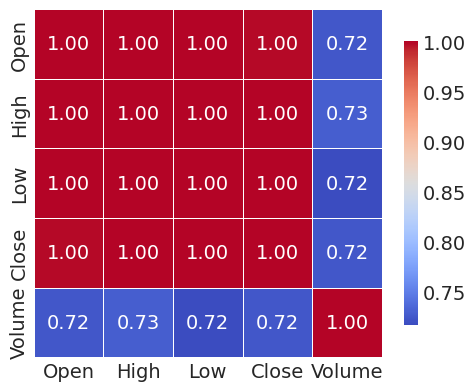

In [ ]:
import seaborn as sns
def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(correlations, cmap = 'coolwarm',annot = True,fmt='.2f',
                square=True, linewidths=.5, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)

####Plotting plots across features

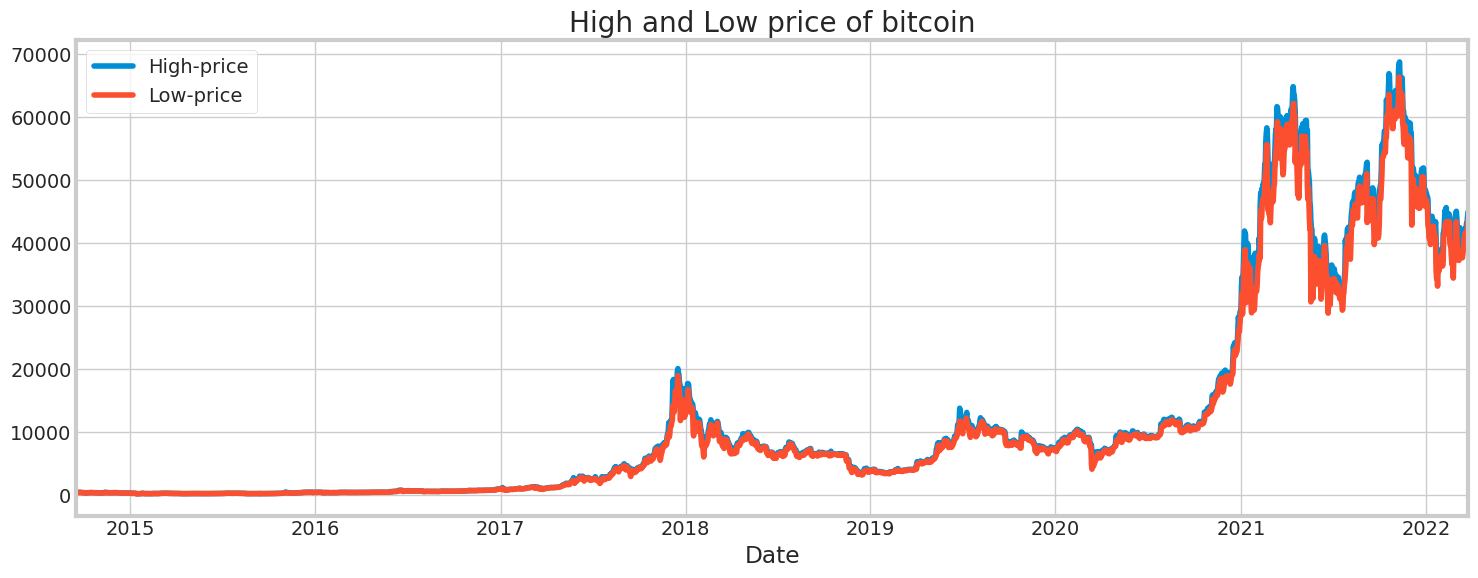

In [ ]:
plt.figure(figsize=(15,6))
df["High"].plot()
df["Low"].plot()
plt.title("High and Low price of bitcoin")
plt.legend(["High-price","Low-price"])
plt.tight_layout()
plt.show()


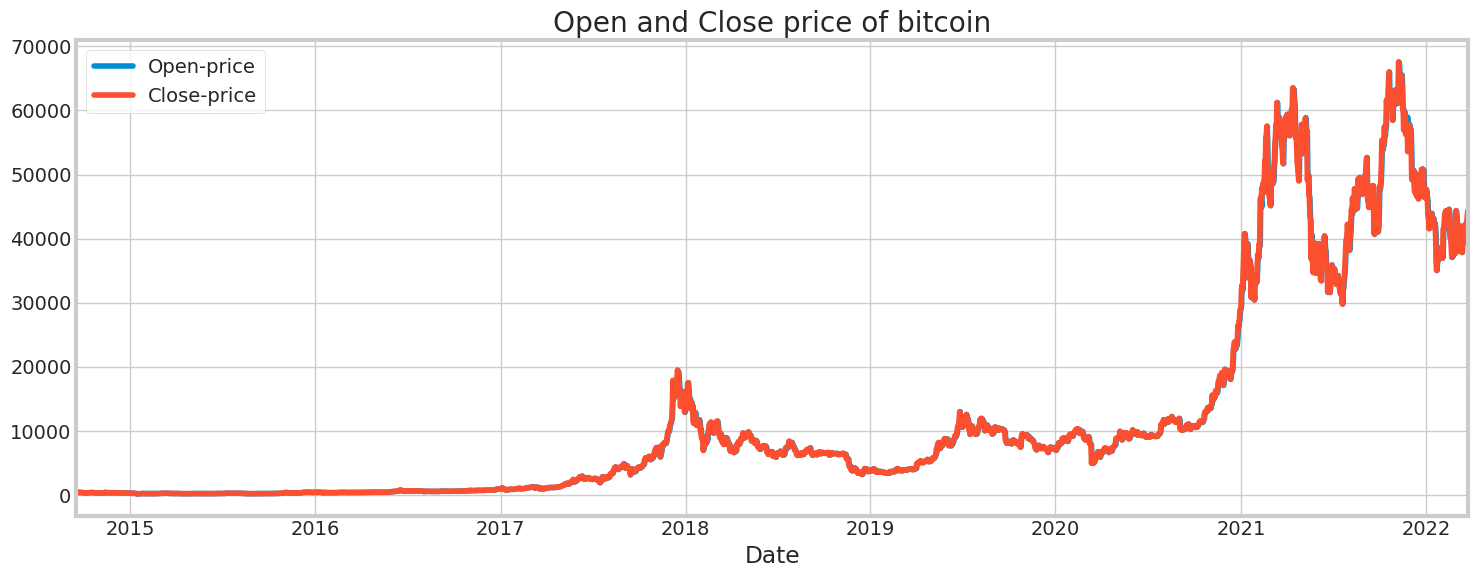

In [ ]:
plt.figure(figsize=(15,6))
df["Open"].plot()
df["Close"].plot()
plt.title("Open and Close price of bitcoin")
plt.legend(["Open-price","Close-price"])
plt.tight_layout()
plt.show()


In [ ]:
df.shape

(2747, 5)

In [ ]:
n_cols = 1
dataset = df["Close"]
dataset = pd.DataFrame(dataset)
data = dataset.values
data.shape

(2747, 1)

###Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(data))


In [ ]:
train_size = int(len(data) * 0.8)
train_size

2197

In [ ]:
data

array([[  457.334015],
       [  424.440002],
       [  394.79599 ],
       ...,
       [42892.95703 ],
       [43960.93359 ],
       [44395.96484 ]])

In [ ]:
scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.63385758],
       [0.64970558],
       [0.65616113]])

#SPLITTING

###Split into X and Y train, test

In [ ]:
from sklearn.model_selection import train_test_split


X=df[["Open","High","Low"]]

#create y(labels)
y=df["Close"]

# Split the dataset into training (80%), testing (20%) sets
#test ad valiadation must be of same size to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of each set to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (2197, 3) (2197,)
Testing set shape: (550, 3) (550,)


In [ ]:
X_train

,Open,High,Low
Date,,,
2018-12-24,4000.331787,4271.792480,4000.331787
2016-11-15,705.794006,715.718018,705.260010
2019-07-23,10346.748050,10346.748050,9883.594727
2016-01-10,448.238007,448.308990,440.351013
2020-04-11,6867.440430,6926.069824,6789.920898
...,...,...,...
2019-03-13,3913.047363,3926.597656,3891.904297
2017-09-16,3637.750000,3808.840088,3487.790039
2017-10-21,5996.790039,6194.879883,5965.069824


In [ ]:
train_size = len(X_train)
train_size

2197

In [ ]:
y_train


Date
2018-12-24    4078.599121
2016-11-15     711.619019
2019-07-23    9900.767578
2016-01-10     447.990997
2020-04-11    6859.083008
                 ...     
2019-03-13    3906.717285
2017-09-16    3625.040039
2017-10-21    6031.600098
2018-04-03    7456.109863
2017-01-24     892.687012
Name: Close, Length: 2197, dtype: float64

##Split into x1 & y1 train and test

In [ ]:
train_data = scaled_data[0:train_size]

In [ ]:
x1_train =[]
y1_train =[]
time_steps = 60
n_cols = 1

for i in range(time_steps, len(train_data)):
  x1_train.append(train_data[i-time_steps:i, :n_cols])
  y1_train.append(train_data[i, :n_cols])
  if i<= time_steps:
    print("X_train", x1_train)
    print("Y_train", y1_train)


X_train [array([[0.00414359],
       [0.00365546],
       [0.00321557],
       [0.00342492],
       [0.0032753 ],
       [0.00332473],
       [0.0038239 ],
       [0.00363714],
       [0.00346454],
       [0.00335845],
       [0.00328567],
       [0.00295417],
       [0.00292874],
       [0.00309905],
       [0.00304965],
       [0.00292288],
       [0.00269198],
       [0.00223721],
       [0.00211322],
       [0.00225521],
       [0.00234585],
       [0.00259445],
       [0.0027738 ],
       [0.0027224 ],
       [0.00273334],
       [0.00297447],
       [0.00315054],
       [0.0033057 ],
       [0.00321523],
       [0.00303393],
       [0.00305177],
       [0.0031658 ],
       [0.00313766],
       [0.00303822],
       [0.00309209],
       [0.00304287],
       [0.00267573],
       [0.00267466],
       [0.00251033],
       [0.00262063],
       [0.00259518],
       [0.00266387],
       [0.00233701],
       [0.00248116],
       [0.00237752],
       [0.00219096],
       [0.00219308],
    

In [ ]:
y1_train

[array([0.00311297]),
 array([0.00310593]),
 array([0.00292475]),
 array([0.00300424]),
 array([0.00266717]),
 array([0.00256341]),
 array([0.00259416]),
 array([0.0028116]),
 array([0.00295002]),
 array([0.00292697]),
 array([0.00282342]),
 array([0.00284272]),
 array([0.00294328]),
 array([0.0029291]),
 array([0.00296702]),
 array([0.0029848]),
 array([0.00301552]),
 array([0.00292196]),
 array([0.00284174]),
 array([0.00294932]),
 array([0.00291862]),
 array([0.00292322]),
 array([0.00272755]),
 array([0.00258376]),
 array([0.00249689]),
 array([0.00255834]),
 array([0.00258855]),
 array([0.00251189]),
 array([0.00257504]),
 array([0.00248175]),
 array([0.00221044]),
 array([0.00210233]),
 array([0.00197797]),
 array([0.00207364]),
 array([0.00225339]),
 array([0.00211816]),
 array([0.00228203]),
 array([0.00232189]),
 array([0.00214325]),
 array([0.00209093]),
 array([0.00222324]),
 array([0.00204426]),
 array([0.00206468]),
 array([0.00199688]),
 array([0.00196819]),
 array([0.002

In [ ]:
x1_train, y1_train = np.array(x1_train), np.array(y1_train)

In [ ]:
x1_train = np.reshape(x1_train,(x1_train.shape[0], x1_train.shape[1], n_cols))

In [ ]:
x1_train.shape , y1_train.shape

((2137, 60, 1), (2137, 1))

#LSTM

LSTM stands for long short-term memory networks, used in the field of Deep Learning. It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems.


In [ ]:
model = Sequential([
    LSTM(50, return_sequences = True, input_shape=(x1_train.shape[1], n_cols)),
    LSTM(64, return_sequences = False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])
model.compile(optimizer = 'adam', loss= 'mse',metrics = 'mean_absolute_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


##Fitting

In [ ]:
history = model.fit(x1_train, y1_train, epochs=50, batch_size=32)

Epoch 1/50
67/67 [==============================] - 22s 141ms/step - loss: 5.3976e-04 - mean_absolute_error: 0.0141
Epoch 2/50
67/67 [==============================] - 11s 161ms/step - loss: 9.3661e-05 - mean_absolute_error: 0.0057
Epoch 3/50
67/67 [==============================] - 9s 136ms/step - loss: 8.2151e-05 - mean_absolute_error: 0.0055
Epoch 4/50
67/67 [==============================] - 5s 79ms/step - loss: 6.8986e-05 - mean_absolute_error: 0.0049
Epoch 5/50
67/67 [==============================] - 4s 66ms/step - loss: 7.0387e-05 - mean_absolute_error: 0.0052
Epoch 6/50
67/67 [==============================] - 6s 95ms/step - loss: 5.8493e-05 - mean_absolute_error: 0.0046
Epoch 7/50
67/67 [==============================] - 4s 66ms/step - loss: 6.2553e-05 - mean_absolute_error: 0.0050
Epoch 8/50
67/67 [==============================] - 5s 70ms/step - loss: 6.7497e-05 - mean_absolute_error: 0.0053
Epoch 9/50
67/67 [==============================] - 6s 90ms/step - loss: 5.9979e-05

###Loss curve

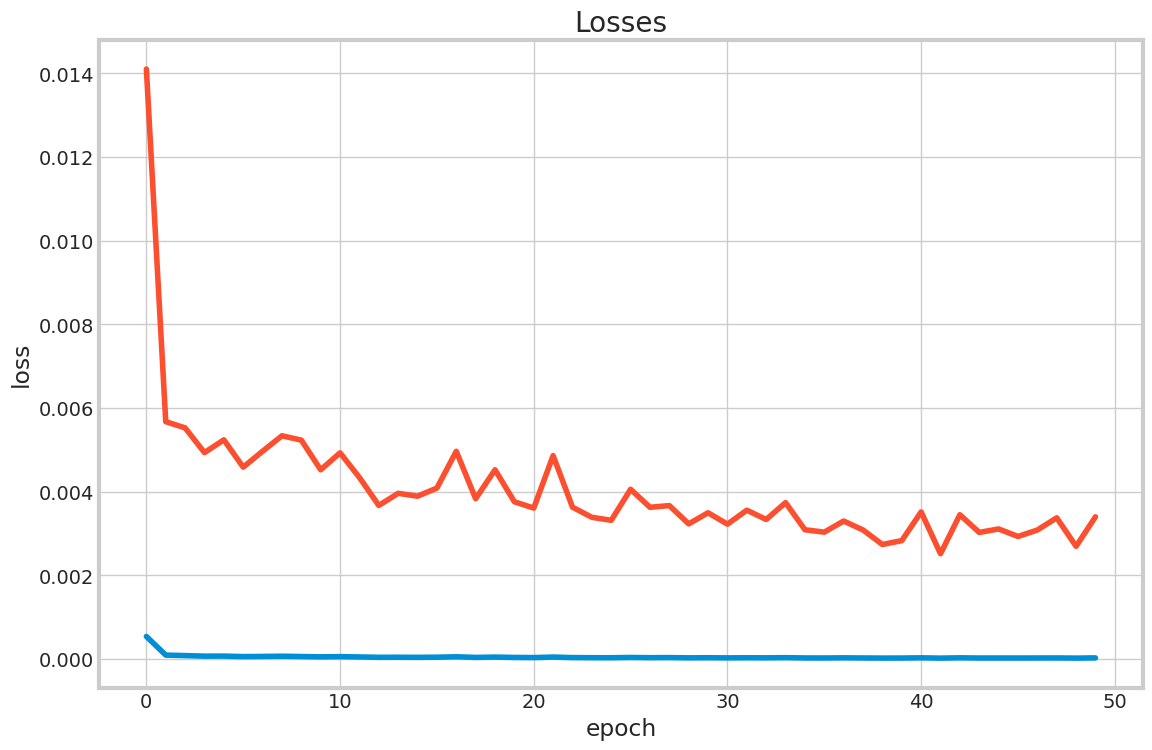

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.title("Losses")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()


In [ ]:
time_steps = 60 
test_data=scaled_data[train_size- time_steps: ,:]

x1_test = []
y1_test = []
n_cols=1

for i in range(time_steps, len(test_data)):
    x1_test.append(test_data[i-time_steps:i, 0:n_cols])
    y1_test.append(test_data[i, 0:n_cols])

x1_test, y1_test= np.array(x1_test), np.array(y1_test) 
x1_test= np.reshape(x1_test, (x1_test.shape[0], x1_test.shape[1], n_cols))

y1_test= np.reshape(y1_test, (y1_test.shape[0], n_cols))

In [ ]:
x1_test

array([[[0.13887768],
        [0.14095845],
        [0.1443426 ],
        ...,
        [0.16198917],
        [0.15967313],
        [0.15260946]],

       [[0.14095845],
        [0.1443426 ],
        [0.1604537 ],
        ...,
        [0.15967313],
        [0.15260946],
        [0.15374021]],

       [[0.1443426 ],
        [0.1604537 ],
        [0.15929549],
        ...,
        [0.15260946],
        [0.15374021],
        [0.14940309]],

       ...,

       [[0.51718068],
        [0.53567866],
        [0.54128083],
        ...,
        [0.60944499],
        [0.60692487],
        [0.6259312 ]],

       [[0.53567866],
        [0.54128083],
        [0.5457278 ],
        ...,
        [0.60692487],
        [0.6259312 ],
        [0.63385758]],

       [[0.54128083],
        [0.5457278 ],
        [0.54421594],
        ...,
        [0.6259312 ],
        [0.63385758],
        [0.64970558]]])

In [ ]:
#y1_test = scaler.inverse_transform(y1_test)
y1_test

array([[0.15374021],
       [0.14940309],
       [0.15702869],
       [0.15602927],
       [0.15689005],
       [0.1572543 ],
       [0.15628058],
       [0.15828371],
       [0.15739114],
       [0.15494208],
       [0.1542969 ],
       [0.1539015 ],
       [0.15568598],
       [0.15752245],
       [0.15471881],
       [0.15567687],
       [0.15933797],
       [0.16154564],
       [0.16498692],
       [0.16629011],
       [0.16883032],
       [0.16690917],
       [0.16696271],
       [0.16793976],
       [0.16536921],
       [0.1659031 ],
       [0.16776184],
       [0.17160043],
       [0.17418688],
       [0.18765137],
       [0.18976155],
       [0.18925178],
       [0.19187126],
       [0.19073029],
       [0.19138432],
       [0.19997582],
       [0.19429336],
       [0.19676555],
       [0.19837769],
       [0.20185709],
       [0.20120586],
       [0.19843655],
       [0.20436947],
       [0.20709108],
       [0.22855078],
       [0.22834351],
       [0.21747927],
       [0.227

In [ ]:
x1_test.shape, y1_test.shape

((550, 60, 1), (550, 1))

In [ ]:
prediction = model.predict(x1_test)

18/18 [==============================] - 2s 29ms/step


In [ ]:
prediction.shape

(550, 1)

In [ ]:
scaler

MinMaxScaler()

In [ ]:
prediction = scaler.inverse_transform(prediction)
prediction.shape

(550, 1)

In [ ]:
prediction

array([[10295.828 ],
       [10323.55  ],
       [10081.173 ],
       [10520.734 ],
       [10514.02  ],
       [10551.949 ],
       [10568.677 ],
       [10506.114 ],
       [10618.295 ],
       [10578.132 ],
       [10424.62  ],
       [10370.561 ],
       [10346.684 ],
       [10456.211 ],
       [10580.686 ],
       [10420.953 ],
       [10455.545 ],
       [10682.323 ],
       [10840.748 ],
       [11059.953 ],
       [11155.03  ],
       [11311.783 ],
       [11207.621 ],
       [11198.262 ],
       [11262.338 ],
       [11118.46  ],
       [11138.851 ],
       [11259.472 ],
       [11507.199 ],
       [11685.801 ],
       [12517.837 ],
       [12717.115 ],
       [12676.8   ],
       [12820.111 ],
       [12764.805 ],
       [12805.106 ],
       [13348.603 ],
       [13049.756 ],
       [13166.464 ],
       [13279.798 ],
       [13505.821 ],
       [13480.953 ],
       [13299.161 ],
       [13649.656 ],
       [13851.954 ],
       [15201.762 ],
       [15278.547 ],
       [14556

In [ ]:
preds_ac = pd.DataFrame(data={"Predictions": prediction.flatten(), "Actuals": y1_test.flatten()})
preds_ac

,Predictions,Actuals
0,10295.828125,10538.45996
1,10323.549805,10246.18652
2,10081.172852,10760.06641
3,10520.734375,10692.71680
4,10514.019531,10750.72363
...,...,...
545,38909.328125,41077.99609
546,38843.886719,42358.80859
547,40342.386719,42892.95703
548,40782.144531,43960.93359


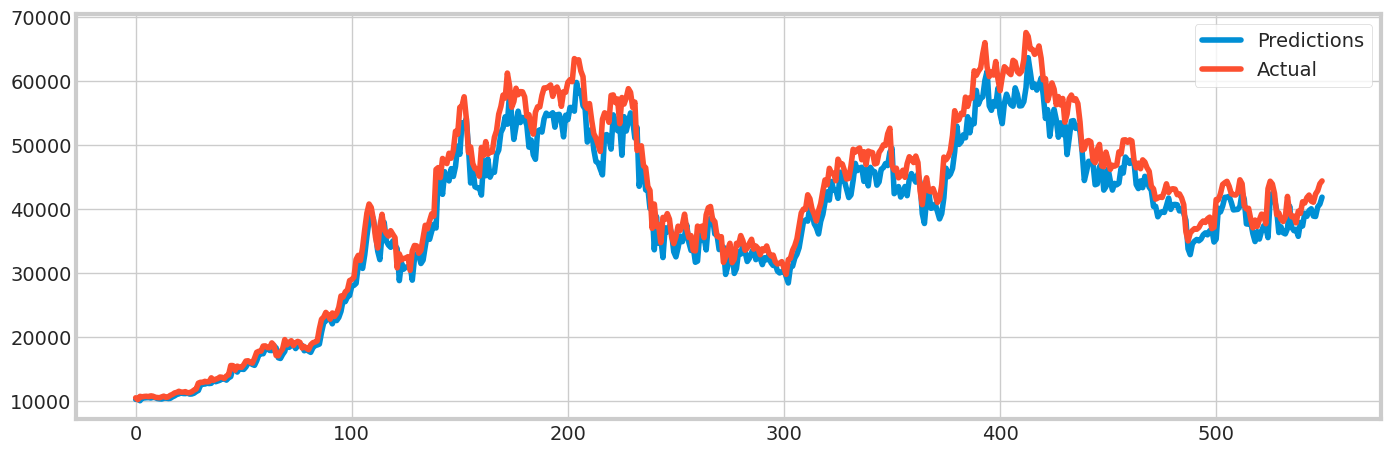

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(preds_ac["Predictions"])
plt.plot(preds_ac["Actuals"])
plt.legend(["Predictions", "Actual"])
plt.show()

In [ ]:
len(dataset)

2747

In [ ]:
train_size

2197

#REGRESSION

##Linear regression 

In [ ]:
X_train

,Open,High,Low
Date,,,
2018-12-24,4000.331787,4271.792480,4000.331787
2016-11-15,705.794006,715.718018,705.260010
2019-07-23,10346.748050,10346.748050,9883.594727
2016-01-10,448.238007,448.308990,440.351013
2020-04-11,6867.440430,6926.069824,6789.920898
...,...,...,...
2019-03-13,3913.047363,3926.597656,3891.904297
2017-09-16,3637.750000,3808.840088,3487.790039
2017-10-21,5996.790039,6194.879883,5965.069824


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler object
scaler = MinMaxScaler()

# Fit scaler to training data
scaler.fit(X_train)

# Transform training and test data
X_train_nor = scaler.transform(X_train)
X_test_nor = scaler.transform(X_test)

# y_train_norm = scaler.transform(y_train.reshape(1,-1))
# y_test_norm = scaler.transform(y_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# # Create a LinearRegression object and fit it to the training data
# lr = LinearRegression()
# lr.fit(X_train, y_train)
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train_nor, y_train)
LinearRegression()


LinearRegression()

In [ ]:
y_train

Date
2018-12-24    4078.599121
2016-11-15     711.619019
2019-07-23    9900.767578
2016-01-10     447.990997
2020-04-11    6859.083008
                 ...     
2019-03-13    3906.717285
2017-09-16    3625.040039
2017-10-21    6031.600098
2018-04-03    7456.109863
2017-01-24     892.687012
Name: Close, Length: 2197, dtype: float64

In [ ]:
reg.fit(X_train_nor, y_train)
score = reg.score(X_test_nor,y_test)
print("Accuracy: {:.2%}".format(score))

Accuracy: 99.95%


In [ ]:
len(y_train)

2197

In [ ]:
# Import necessary libraries
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_nor)
X_test_scaled = scaler.transform(X_test_nor)



# Create Ridge model and fit to training data
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)

# Make predictions on test data

ridge_pred = ridge.predict(X_test_scaled)

# Evaluate model performance using mean squared error and R-squared

ridge_r2 = r2_score(y_test, ridge_pred)

ridge_mae = mean_absolute_error(y_test,ridge_pred)
print('Ridge R-squared:', ridge_r2)
print("Ridge MAE:", ridge_mae)


Ridge R-squared: 0.9994760940089361
Ridge MAE: 141.60806176937106


In [ ]:
# assume y_pred and y_true are Pandas Series objects
y_pred_np = np.array(ridge_pred)
y_true_np = np.array(y_test)

# use the flatten() method on the NumPy arrays
y_pred_flat = y_pred_np.flatten()
y_true_flat = y_true_np.flatten()

# calculate the regression metrics using the flattened arrays
mse = mean_squared_error(y_true_flat, y_pred_flat)
mae = mean_absolute_error(y_true_flat, y_pred_flat)


In [ ]:
preds_lr = pd.DataFrame(data={"Predictions": y_pred_flat, "Actuals": y_true_flat})
preds_lr

,Predictions,Actuals
0,42934.708798,43113.878910
1,38776.812977,38431.378910
2,18967.374403,18732.121090
3,45474.937958,45585.031250
4,3837.826381,3857.297607
...,...,...
545,6666.489848,6741.750000
546,9587.964232,9607.423828
547,11642.968802,11680.820310
548,283.515110,286.393005


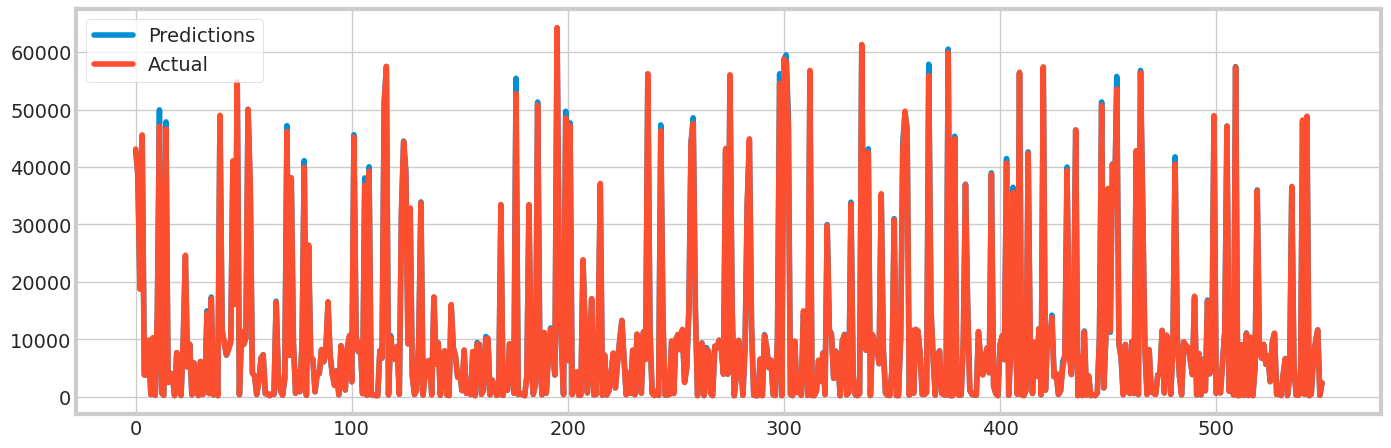

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(preds_lr["Predictions"])
plt.plot(preds_lr["Actuals"])
plt.legend(["Predictions", "Actual"])
plt.show()

##RandomForest

In [ ]:
X_test

,Open,High,Low
Date,,,
2022-01-16,43172.039060,43436.808590,42691.023440
2022-02-20,40118.101560,40119.890630,38112.812500
2020-11-25,19104.410160,19390.964840,18581.146480
2021-08-10,46280.847660,46637.988280,44705.554690
2018-12-26,3819.666748,3893.359619,3769.863770
...,...,...,...
2018-07-16,6357.009766,6741.750000,6357.009766
2019-07-30,9522.329102,9701.759766,9437.335938
2020-08-31,11713.306640,11768.876950,11598.318360


In [ ]:
y_test

Date
2022-01-16    43113.878910
2022-02-20    38431.378910
2020-11-25    18732.121090
2021-08-10    45585.031250
2018-12-26     3857.297607
                  ...     
2018-07-16     6741.750000
2019-07-30     9607.423828
2020-08-31    11680.820310
2015-03-15      286.393005
2017-07-01     2434.550049
Name: Close, Length: 550, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9991201790879867

In [ ]:
#compare predictions to truth labels to evaluate the model 
y_preds = model.predict(X_test)


In [ ]:
# Load the necessary libraries and dataset
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_absolute_error

# Create a Ridge regression model and fit it to the training data
ridge = Ridge(alpha=1.0)  # Set the regularization parameter (alpha) to 1.0
ridge.fit(X_train, y_train)

# Evaluate the model on the testing data using mean squared error
y_pred = ridge.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute Error:', mae)


Mean absolute Error: 140.18834697338912


In [ ]:
# assume y_pred and y_true are Pandas Series objects
y_pred_np = np.array(y_pred)
y_true_np = np.array(y_test)

# use the flatten() method on the NumPy arrays
y_pred_flat = y_pred_np.flatten()
y_true_flat = y_true_np.flatten()

# calculate the regression metrics using the flattened arrays
mse = mean_squared_error(y_true_flat, y_pred_flat)
mae = mean_absolute_error(y_true_flat, y_pred_flat)


In [ ]:
preds_rf = pd.DataFrame(data={"Predictions": y_pred_flat, "Actuals": y_true_flat})
preds_rf

,Predictions,Actuals
0,42895.386695,43113.878910
1,38705.037825,38431.378910
2,18954.819261,18732.121090
3,45422.225820,45585.031250
4,3836.570709,3857.297607
...,...,...
545,6680.498826,6741.750000
546,9585.918985,9607.423828
547,11631.227490,11680.820310
548,282.964656,286.393005


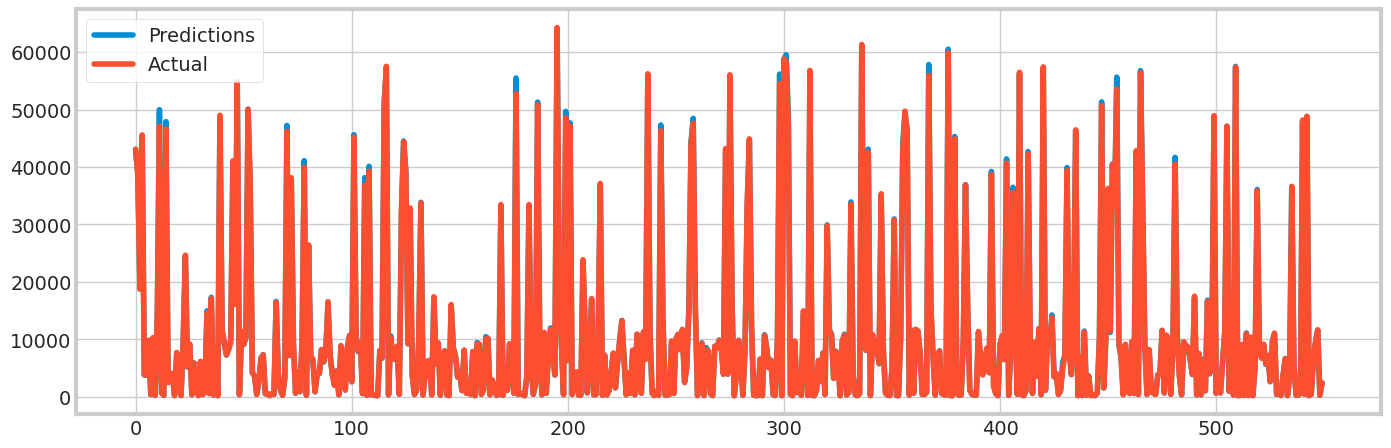

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(preds_lr["Predictions"])
plt.plot(preds_lr["Actuals"])
plt.legend(["Predictions", "Actual"])
plt.show()

#PREDICTION 

In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.2
    Uninstalling MarkupSafe-2.1.2:
      Successfully uninstalled MarkupSafe-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 2.2.3 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
pip install jinja2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.regression import *

In [ ]:
dt = pd.read_csv("/content/drive/MyDrive/Minor_prj/data_bit.csv")

In [ ]:
dt

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/17/2014,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,9/18/2014,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,9/19/2014,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,9/20/2014,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,9/21/2014,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2742,3/21/2022,41246.132810,41454.410160,40668.042970,41077.996090,41077.996090,2.461554e+10
2743,3/22/2022,41074.105470,43124.707030,40948.281250,42358.808590,42358.808590,3.200465e+10
2744,3/23/2022,42364.378910,42893.507810,41877.507810,42892.957030,42892.957030,2.524294e+10
2745,3/24/2022,42886.652340,44131.855470,42726.164060,43960.933590,43960.933590,3.104299e+10


####Make data ready 

In [ ]:
#Variale for predicting 1 day out into the future 

future =1
#Create a new column 
dt["Future_price"] = dt[["Close"]].shift(-future)
dt = dt[["Close","Future_price"]]
dt

,Close,Future_price
0,457.334015,424.440002
1,424.440002,394.795990
2,394.795990,408.903992
3,408.903992,398.821014
4,398.821014,402.152008
...,...,...
2742,41077.996090,42358.808590
2743,42358.808590,42892.957030
2744,42892.957030,43960.933590
2745,43960.933590,44395.964840


In [ ]:
fp = dt.copy()
fp

,Close,Future_price
0,457.334015,424.440002
1,424.440002,394.795990
2,394.795990,408.903992
3,408.903992,398.821014
4,398.821014,402.152008
...,...,...
2742,41077.996090,42358.808590
2743,42358.808590,42892.957030
2744,42892.957030,43960.933590
2745,43960.933590,44395.964840


In [ ]:
X1 = np.array(fp[fp.columns])
#remove last n rows from the data set where 'n' is the future_days =1
X1 = X1[:len(fp)-future]
#Create the dependent data set (y) and convert
y1 = np.array(fp["Future_price"])


In [ ]:
#Y vales expect the last 1 row

y1 = y1[:-future]

In [ ]:
X1

array([[  457.334015,   424.440002],
       [  424.440002,   394.79599 ],
       [  394.79599 ,   408.903992],
       ...,
       [42358.80859 , 42892.95703 ],
       [42892.95703 , 43960.93359 ],
       [43960.93359 , 44395.96484 ]])

####Split the data into train and test


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, shuffle=False)


In [ ]:
#Get the train data and transform it to a dataframe 

train_data = pd.DataFrame(X1_train, columns = fp.columns)
train_data

,Close,Future_price
0,457.334015,424.440002
1,424.440002,394.795990
2,394.795990,408.903992
3,408.903992,398.821014
4,398.821014,402.152008
...,...,...
2191,10974.905270,10948.990230
2192,10948.990230,10944.585940
2193,10944.585940,11094.346680
2194,11094.346680,10938.271480


In [ ]:
#For test data
test_data = pd.DataFrame(X1_test,columns=fp.columns)
test_data


,Close,Future_price
0,10462.25977,10538.45996
1,10538.45996,10246.18652
2,10246.18652,10760.06641
3,10760.06641,10692.71680
4,10692.71680,10750.72363
...,...,...
545,41247.82422,41077.99609
546,41077.99609,42358.80859
547,42358.80859,42892.95703
548,42892.95703,43960.93359


In [ ]:
regression = setup(data = train_data, target ='Future_price', session_id = 132, use_gpu = True)

,Description,Value
0,Session id,132
1,Target,Future_price
2,Target type,Regression
3,Original data shape,"(2196, 2)"
4,Transformed data shape,"(2196, 2)"
5,Transformed train set shape,"(1537, 2)"
6,Transformed test set shape,"(659, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


####Finding the best model (pycaret)

In [ ]:
#Train on all the models and sort it by thr R- square metric(R2)

best_model = compare_models(sort ='r2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,135.8848,82882.2402,284.1592,0.9951,0.0515,0.0380,0.0680
lasso,Lasso Regression,135.8848,82882.2367,284.1592,0.9951,0.0515,0.0380,0.0780
br,Bayesian Ridge,135.8898,82882.2098,284.1590,0.9951,0.0515,0.0380,0.0380
omp,Orthogonal Matching Pursuit,135.8848,82882.2180,284.1592,0.9951,0.0515,0.0380,0.0410
huber,Huber Regressor,131.9680,82967.2926,284.5814,0.9951,0.0413,0.0266,0.0730
lar,Least Angle Regression,135.8848,82882.2262,284.1592,0.9951,0.0515,0.0380,0.0390
en,Elastic Net,135.8848,82882.2336,284.1592,0.9951,0.0515,0.0380,0.0390
ridge,Ridge Regression,135.8848,82882.2180,284.1592,0.9951,0.0515,0.0380,0.0670
llar,Lasso Least Angle Regression,135.8849,82882.2453,284.1593,0.9951,0.0515,0.0380,0.0370
gbr,Gradient Boosting Regressor,144.5817,93268.2337,299.3886,0.9945,0.0465,0.0326,0.2600


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
#Create the linear regression model 

models = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,165.9348,117367.5547,342.5895,0.9941,0.0557,0.0424
1,127.1010,59866.8906,244.6771,0.9960,0.0469,0.0367
2,106.1237,37125.9883,192.6811,0.9976,0.0445,0.0356
3,163.8315,102528.2188,320.2003,0.9944,0.0640,0.0498
4,130.9103,76616.7031,276.7972,0.9948,0.0466,0.0350
5,128.3485,68258.4766,261.2632,0.9957,0.0472,0.0349
6,135.3091,69334.4219,263.3143,0.9958,0.0435,0.0326
7,135.4153,106740.6172,326.7118,0.9945,0.0556,0.0382
8,130.6751,118765.2578,344.6234,0.9921,0.0616,0.0395


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

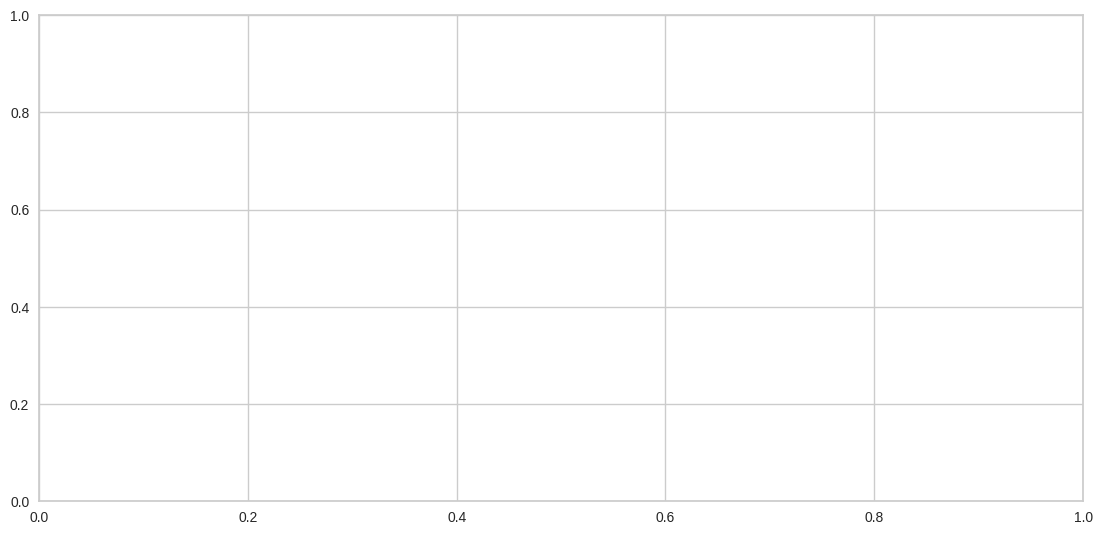

In [ ]:
evaluate_model(models)

In [ ]:
##Get the prediction 
unseen_preds = predict_model(models, data=test_data)
unseen_preds

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,1176.6448,2801527.0000,1673.7762,0.9866,0.0395,0.0286


,Close,Future_price,prediction_label
0,10462.259766,10538.459961,10444.283203
1,10538.459961,10246.186523,10520.218750
2,10246.186523,10760.066406,10228.962891
3,10760.066406,10692.716797,10741.052734
4,10692.716797,10750.723633,10673.937500
...,...,...,...
545,41247.824219,41077.996094,41122.605469
546,41077.996094,42358.808594,40953.367188
547,42358.808594,42892.957031,42229.718750
548,42892.957031,43960.933594,42762.007812


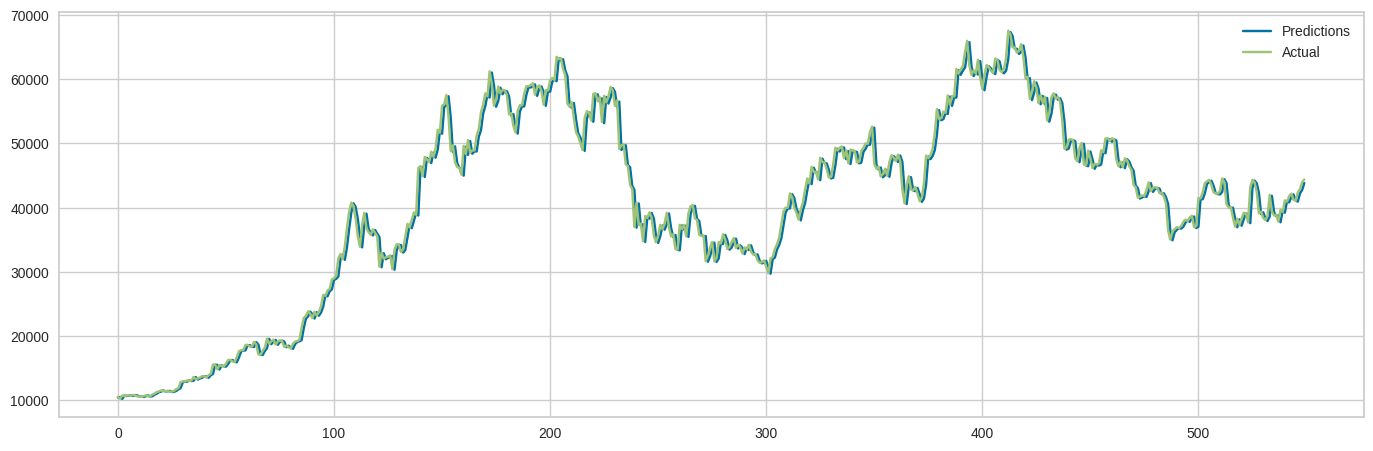

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(unseen_preds["prediction_label"])
plt.plot(unseen_preds["Future_price"])
plt.legend(["Predictions", "Actual"])
plt.show()